# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Load and prepare data**

> This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api
> The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.

In [2]:
columns = ["label", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', \
                 encoding='ISO-8859-1', names=columns)

# Exploring the data

In [3]:
df.head(-5)

,label,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS


In [4]:
#handle labels of positive tweets 4 >> 1
df['label'] = df['label'].replace(4,1)

In [5]:
df.shape

(1600000, 6)

In [6]:
df.isnull().sum()

label    0
ids      0
date     0
flag     0
user     0
text     0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

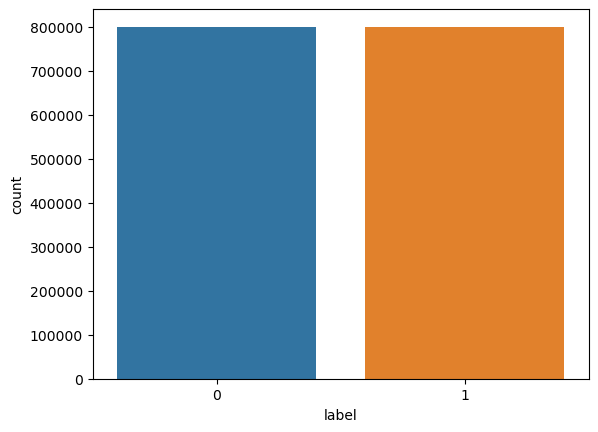

In [7]:
sns.countplot(x='label', data=df)

# Split the data

In [8]:
X,y = df.text, df.label

In [9]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

# **Modeling**

In [10]:
count = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
count.fit(X_train)

X_train = count.transform(X_train)
X_test = count.transform(X_test)

In [11]:
model = LogisticRegression() 
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# **Evaluation**

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(accuracy_score(y_test, y_pred))

0.798175


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159804
           1       0.79      0.81      0.80    160196

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



[[125480  34324]
 [ 30260 129936]]


<AxesSubplot:>

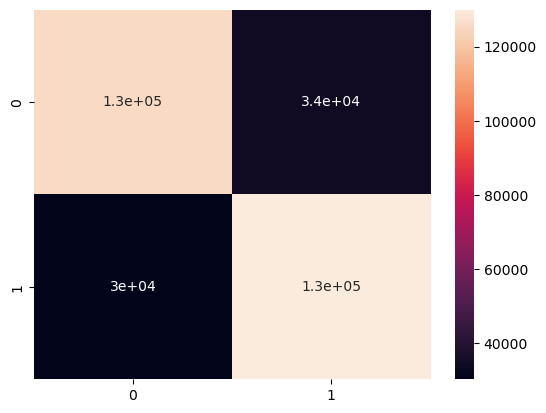

In [15]:
import seaborn as sns
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)